In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import matplotlib.image as mpimg
import cv2
import copy

In [41]:
clip_name ='farm'
clip_dir = f'C:\\Users\\MrLin\\OneDrive\\COMPLEX OBJECTS\\PROJECTS\\SATURATION\\JUPYTER NOTEBOOK\\movies\\{clip_name}'
imgs_dir = f'{clip_dir}\\imgs'
imgs_path = Path(imgs_dir)
file_name = f'{clip_name}.png'
file_path = f'{clip_dir}\\{file_name}'  # will list the entire path
N_frames = 30*6+1
save_path = f'{clip_dir}\\imgs'
print(file_path)

C:\Users\MrLin\OneDrive\COMPLEX OBJECTS\PROJECTS\SATURATION\JUPYTER NOTEBOOK\movies\farm\farm.png


In [3]:
def normalize_HLS(hls_img):
#     img = copy.deepcopy(hls_img).astype('float')
    img = hls_img.astype('float')
    img[:, :, 0] = 2 * (img[:, :, 0] * np.pi/180 - np.pi / 2) # convert degrees to radians in the range [-pi, pi]
    img[:, :, 1] = img[:, :, 1] / 255  # normalize z to [0, 1]
    img[:, :, 2] = img[:, :, 2] / 255  # normalize radius to [0, 1]
    
    return img

In [4]:
def extreme_saturation(hls_img, SAT):
#     HLS_img = copy.deepcopy(hls_img).astype('float')
    HLS_img = hls_img.astype('float')
    if 0 <= SAT <= 1:
        HLS_img[:, :, 2] = HLS_img[:, :, 2] * SAT
        return HLS_img
    elif 1 < SAT <= 3:
        s0 = HLS_img[:, :, 2]
        HLS_img[:, :, 2] = SAT * (1 - s0) / 2 + (3 * s0 - 1) / 2
        return HLS_img
    else:
        raise ValueError("The value of SAT must be between 0 and 3.")

In [5]:
def reverse_normalize_hls(hls_img):
    # reverses normalizations applied in normalize_HLS()
#     img = copy.deepcopy(hls_img).astype('float')
    img = hls_img.astype('float')
#     print(img.shape)
    img[:, :, 0] = (img[:, :, 0] / 2 + np.pi / 2) * (180 / np.pi)
    img[:, :, 1] = img[:, :, 1] * 255
    img[:, :, 2] = img[:, :, 2] * 255
    # prepare for conversion into RGB using cv2
    img[:, :, 0] = np.clip(np.round(img[:, :, 0]), 0, 179)
    img[:, :, 1:] = np.clip(np.round(img[:, :, 1:]), 0, 255)
    
    return img.astype('uint8')

In [79]:
# def color_rotation(hls_img, angle):
#     # function that rotates colors in HLS space by angle in deg
#     # H channel should already be in [-pi, pi]
#     angle = angle * np.pi/180  # convert to rad
#     HLS_img = hls_img.astype('float')
    
#     H = HLS_img[:, :, 0]
#     H = H + angle
#     H[H < -np.pi] += 2 * np.pi
#     H[H > np.pi] -= 2 * np.pi
#     HLS_img[:, :, 0] = H
    
#     return HLS_img

In [44]:
def color_rotation_raw(hls_img, degrees):
    # function that rotates colors in HLS space by angle in deg
    # H channel should already be in [0, 179]
    HLS_img = hls_img.copy()
    H = HLS_img[:, :, 0]
    H = np.mod(H + degrees, 180)
    HLS_img[:, :, 0] = H
    
    return HLS_img

In [42]:
# Load image
img = cv2.imread(str(file_path))  # shape is [1080, 1920, 4] The 4th channel is alpha
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # must convert from BGR to RGB
img_RGB.shape
# make HLS image
img_HLS = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HLS)
# img_HLS.shape

# normalize HLS
HLS_norm = normalize_HLS(img_HLS)

## linearly increase SAT, and save image sequence

In [46]:
# dat_stack_RGB = np.zeros(shape=(row_indices.size, 3, N_frames))
# dat_stack_HLS = np.zeros(shape=(row_indices.size, 3, N_frames))
SAT_values = np.linspace(0, 3, N_frames)

for t, SAT in zip(range(N_frames), SAT_values):
    if N_frames-1 <= t < 202:
        # apply slider value
        transformed_img = extreme_saturation(HLS_norm, SAT)
        transformed_img = reverse_normalize_hls(transformed_img)
        img_RGB = cv2.cvtColor(transformed_img, cv2.COLOR_HLS2RGB)  # Try COLOR_HLS2BGR or COLOR_HLS2RGB here
        
        plt.imshow(img_RGB)  
        plt.axis('off')

#         # Save the image to a file
        plt.savefig(f'{save_path}\\{clip_name}{t:03d}.png', bbox_inches='tight', pad_inches=0, dpi=300)  # dpi=300 this preserve the original resolution?
        plt.close()  # execution will SLOW down without closing the fig

In [92]:
img = cv2.imread(str(file_path))  # shape is [1080, 1920, 4] The 4th channel is alpha
img.shape
# make HLS image
img_HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
np.mod(img_HLS[:, :, 0] + 30, 180)

179

## Rotate color

In [45]:
# dat_stack_RGB = np.zeros(shape=(row_indices.size, 3, N_frames))
# dat_stack_HLS = np.zeros(shape=(row_indices.size, 3, N_frames))
# rot_angle_values = np.linspace(0, N_frames-1, N_frames)  # this format may prevent "jumpy" motion in the rotation plot
rot_angle_values = np.linspace(0, 180, N_frames)

for t, theta in zip(range(N_frames), rot_angle_values):
    if 0 <= t < 202:
        # apply slider value
        transformed_img = color_rotation_raw(img_HLS, theta)
        img_RGB = cv2.cvtColor(transformed_img, cv2.COLOR_HLS2RGB)
        
        plt.imshow(img_RGB)  
        plt.axis('off')

#         # Save the image to a file
        plt.savefig(f'{save_path}\\{clip_name}{t:03d}.png', bbox_inches='tight', pad_inches=0, dpi=300)
        plt.close()  # execution will SLOW down without closing the fig

In [114]:
np.linspace(0, 360, 30*6+1)

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198., 200., 202., 204., 206., 208., 210., 212., 214., 216., 218.,
       220., 222., 224., 226., 228., 230., 232., 234., 236., 238., 240.,
       242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284.,
       286., 288., 290., 292., 294., 296., 298., 30

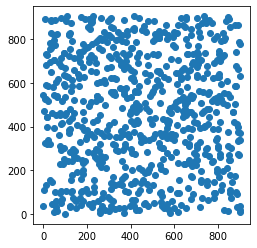

In [3]:
# fraction_of_pixels_plotted = 0.0009  # at 0.0005 leads to 1K pixels plotted

# img = mpimg.imread(file_path)
# img = img[:, :, 0]  # 2D image needed to sample pixels
# indices = np.random.choice(img.size, size=int(np.floor(img.size*fraction_of_pixels_plotted)), replace=False)
# row_indices, col_indices = np.unravel_index(indices, img.shape)

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.scatter(col_indices, row_indices)
# ax.set_aspect('equal')
# plt.show()